#**Loading the Data**

In [1]:
# Access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import pandas
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/grants.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Unnamed: 0,opportunity_id,opportunity_title,opportunity_number,opportunity_category,funding_instrument_type,category_of_funding_activity,cfda_numbers,eligible_applicants,eligible_applicants_type,...,post_date,close_date,last_updated_date,archive_date,award_ceiling,award_floor,estimated_total_program_funding,expected_number_of_awards,cost_sharing_or_matching_requirement,additional_information_url
0,0,262148,Establishment of the Edmund S. Muskie Graduate...,SCAPPD-14-AW-161-SCA-08152014,Discretionary,Cooperative Agreement,Other,19.040,Others,Non-Government Organization,...,2014-08-15,2014-09-04,2014-08-20,2014-10-04,600000.0,400000.0,600000.0,1.0,False,NaN
1,1,262308,Health and resiliency of salt marshes in Jamai...,NPS-14-NERO-0119,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-18,2014-08-23,2014-08-18,2014-08-24,275897.0,275897.0,275897.0,1.0,False,NaN
2,2,262368,Post-Hurricane Sandy submerged marine habitat ...,NPS-14-NERO-0125,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-19,2014-08-24,2014-08-19,2014-08-25,480000.0,480000.0,480000.0,1.0,False,NaN
3,3,262390,Inventory and Monitoring of Amphibians and Rep...,NPS-14-NERO-0087,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-19,2014-08-24,2014-08-19,2014-08-25,255577.0,255577.0,255577.0,1.0,False,NaN
4,4,131594,Youth Leadership Program with Algeria,ECA-PE-C-PY-12-09,Discretionary,Cooperative Agreement,Other,19.415,Others,Non-Government Organization,...,2011-11-21,2012-01-04,2011-11-21,2012-01-05,250000.0,NaN,250000.0,1.0,True,http://exchanges.state.gov/grants/open2.html


#**Preprocessing**

In [5]:
# Import the necessary modules
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values in the relevant columns
df = df.dropna(subset=['opportunity_title', 'category_of_funding_activity'])

# Define the features and target
texts = df['opportunity_title'].astype(str).values
labels = df['category_of_funding_activity'].astype(str).values

# Tokenize and convert text to sequences
tokenizer = Tokenizer(num_words=10000)  # Adjust vocab size as needed
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform input size
max_sequence_length = 150  # Adjust based on average title length
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print(f"Number of categories: {len(label_encoder.classes_)}")


Training samples: 60512, Testing samples: 15128
Number of categories: 26


#**RNN Model**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),  # Embedding layer
    LSTM(128, return_sequences=False),  # You can switch to GRU if preferred
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),  # Fully connected layer
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#**Model Training**

In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,  # Adjust based on performance
    batch_size=32,  # Adjust based on dataset size
    verbose=1
)


Epoch 1/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 533s 281ms/step - accuracy: 0.4958 - loss: 1.7286 - val_accuracy: 0.7230 - val_loss: 0.9795
Epoch 2/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 569s 284ms/step - accuracy: 0.7556 - loss: 0.8472 - val_accuracy: 0.7482 - val_loss: 0.8694
Epoch 3/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 594s 301ms/step - accuracy: 0.7923 - loss: 0.6951 - val_accuracy: 0.7563 - val_loss: 0.8509
Epoch 4/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 589s 284ms/step - accuracy: 0.8210 - loss: 0.5933 - val_accuracy: 0.7567 - val_loss: 0.8587
Epoch 5/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 562s 284ms/step - accuracy: 0.8368 - loss: 0.5299 - val_accuracy: 0.7616 - val_loss: 0.8949
Epoch 6/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 559s 283ms/step - accuracy: 0.8488 - loss: 0.4809 - val_accuracy: 0.7600 - val_loss: 0.9305
Epoch 7/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 534s 282ms/step - accuracy: 0.8613 - loss: 0.4382 - val_accuracy: 0.7591 - val_loss: 0.9702
Epoch 8/10
1891/1891 ━━━━━━━━━━━━━━━━━━━━ 564s 284ms/step - ac

#**Evaluating the model**

In [8]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict on new data
sample_titles = ["Improving healthcare access in rural areas", "Climate resilience research funding"]
sample_sequences = tokenizer.texts_to_sequences(sample_titles)
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_length)
predictions = model.predict(sample_padded)
predicted_categories = label_encoder.inverse_transform(predictions.argmax(axis=1))

for title, category in zip(sample_titles, predicted_categories):
    print(f"Title: {title}\nPredicted Category: {category}\n")


473/473 ━━━━━━━━━━━━━━━━━━━━ 51s 107ms/step - accuracy: 0.7572 - loss: 1.1704
Test Loss: 1.1744, Test Accuracy: 0.7573
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Title: Improving healthcare access in rural areas
Predicted Category: Health

Title: Climate resilience research funding
Predicted Category: Science and Technology and other Research and Development



#**Visualize Training Progress**

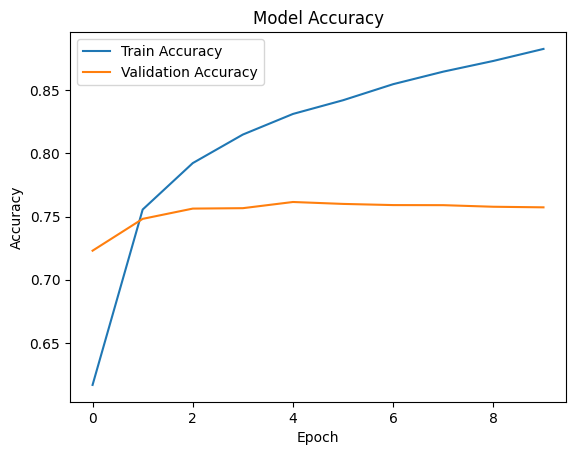

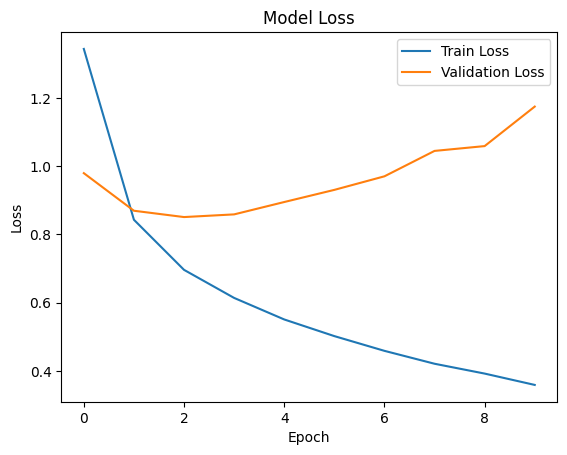

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


#**Save Model**

In [10]:
# Save the model and tokenizer
model.save('rnn_funding_category_model.h5')

import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
